In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager
import numpy as np
import seaborn as sns
import pandas as pd

from sklearn.linear_model import Ridge, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

[f.name for f in matplotlib.font_manager.fontManager.ttflist if 'Nanum' in f.name]
 # ['NanumBarunGothic',
 # 'NanumMyeongjo',
 # 'NanumMyeongjo',
 # 'NanumGothic',
 # 'NanumBarunGothic',
 # 'NanumGothic']

#pd.set_option('display.max_rows', None)

# 최대 열 출력 수 조절
#pd.set_option('display.max_columns', None)

# 열 너비 조절 (길게 보여줌)
#pd.set_option('display.max_colwidth', None)

# 전체 폭 자동 조절
#pd.set_option('display.width', None)

z = pd.read_csv("/content/on_users.csv", encoding="euc-kr")
zz = pd.DataFrame(z)


In [ ]:

print(zz.head())
print(zz.info())
print(zz.describe())
print(zz.columns)

   idUser Gender  Age  FamilyCount MemberYN
0  U10001     여성   26            2        Y
1  U10002     남성   61            2        Y
2  U10003     여성   34            2        Y
3  U10004     남성   26            1        N
4  U10005     여성   33            3        Y
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   idUser       3000 non-null   object
 1   Gender       3000 non-null   object
 2   Age          3000 non-null   int64 
 3   FamilyCount  3000 non-null   int64 
 4   MemberYN     3000 non-null   object
dtypes: int64(2), object(3)
memory usage: 117.3+ KB
None
               Age  FamilyCount
count  3000.000000  3000.000000
mean     36.785667     1.622667
std      10.949141     0.971563
min      21.000000     0.000000
25%      29.000000     1.000000
50%      35.000000     2.000000
75%      43.000000     2.000000
max      69.000000     3.00000

In [ ]:
print(zz["idUser"])

0       U10001
1       U10002
2       U10003
3       U10004
4       U10005
         ...  
2995    U12996
2996    U12997
2997    U12998
2998    U12999
2999    U13000
Name: idUser, Length: 3000, dtype: object


In [ ]:
y = pd.read_csv("/content/on_items.csv", encoding="cp949")
yy = pd.DataFrame(y)


In [ ]:
print(yy.head())
print(yy.info())
print(yy.describe())
print(yy.columns)

  ItemLargeCode ItemLargeName ItemMiddleCode ItemMiddleName ItemSmallCode  \
0            L1          가공식품            M11             곡물         S0080   
1            L1          가공식품            M11             곡물         S0080   
2            L1          가공식품            M11             곡물         S0080   
3            L1          가공식품            M11             곡물         S0080   
4            L1          가공식품            M11             곡물         S0080   

  ItemSmallName           ItemCode                        ItemName  PriceYear  \
0            국수  L1-M11-S0080-1001            (식품)샘표 김치국수 101g 10입       2022   
1            국수  L1-M11-S0080-1001            (식품)샘표 김치국수 101g 10입       2023   
2            국수  L1-M11-S0080-1001            (식품)샘표 김치국수 101g 10입       2024   
3            국수  L1-M11-S0080-1002  2.1kg 6배 메밀 Bestco 희석용 소바 국수장국       2023   
4            국수  L1-M11-S0080-1002  2.1kg 6배 메밀 Bestco 희석용 소바 국수장국       2024   

   PriceMin  PriceMax  
0     15840     16130  
1 

In [ ]:
x = pd.read_csv("/content/on_orders_.csv", encoding="cp949")
xx = pd.DataFrame(x)


In [ ]:
print(xx.head())
print(xx.info())
print(xx.describe())
print(xx.columns)

   idUser            idOrder             OrderDT           ItemCode  Price  \
0  U10001  U10001-O2022-1002  06JAN2022:17:08:51  L4-M17-S0530-1024  33310   
1  U10001  U10001-O2022-1002  06JAN2022:17:08:51  L1-M21-S0540-1082   3780   
2  U10001  U10001-O2022-1002  06JAN2022:17:08:51  L1-M15-S0140-1311  22520   
3  U10001  U10001-O2022-1002  06JAN2022:17:08:51  L4-M12-S0350-1035  21630   
4  U10001  U10001-O2022-1003  13JAN2022:16:50:14  L4-M12-S0640-1057  11700   

           DeliveryDT  
0  07JAN2022:06:24:00  
1  07JAN2022:06:24:00  
2  07JAN2022:06:24:00  
3  07JAN2022:06:24:00  
4  14JAN2022:06:28:00  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855365 entries, 0 to 855364
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   idUser      855365 non-null  object
 1   idOrder     855365 non-null  object
 2   OrderDT     855365 non-null  object
 3   ItemCode    855365 non-null  object
 4   Price       855365 non-nul

In [ ]:
#q = pd.concat([xx, yy, zz])

#print(q.count)

In [ ]:
#print(q[q["idUser"] == "U10001"] )

In [ ]:
print(yy.head())

  ItemLargeCode ItemLargeName ItemMiddleCode ItemMiddleName ItemSmallCode  \
0            L1          가공식품            M11             곡물         S0080   
1            L1          가공식품            M11             곡물         S0080   
2            L1          가공식품            M11             곡물         S0080   
3            L1          가공식품            M11             곡물         S0080   
4            L1          가공식품            M11             곡물         S0080   

  ItemSmallName           ItemCode                        ItemName  PriceYear  \
0            국수  L1-M11-S0080-1001            (식품)샘표 김치국수 101g 10입       2022   
1            국수  L1-M11-S0080-1001            (식품)샘표 김치국수 101g 10입       2023   
2            국수  L1-M11-S0080-1001            (식품)샘표 김치국수 101g 10입       2024   
3            국수  L1-M11-S0080-1002  2.1kg 6배 메밀 Bestco 희석용 소바 국수장국       2023   
4            국수  L1-M11-S0080-1002  2.1kg 6배 메밀 Bestco 희석용 소바 국수장국       2024   

   PriceMin  PriceMax  
0     15840     16130  
1 

In [ ]:
print(xx.head())

   idUser            idOrder             OrderDT           ItemCode  Price  \
0  U10001  U10001-O2022-1002  06JAN2022:17:08:51  L4-M17-S0530-1024  33310   
1  U10001  U10001-O2022-1002  06JAN2022:17:08:51  L1-M21-S0540-1082   3780   
2  U10001  U10001-O2022-1002  06JAN2022:17:08:51  L1-M15-S0140-1311  22520   
3  U10001  U10001-O2022-1002  06JAN2022:17:08:51  L4-M12-S0350-1035  21630   
4  U10001  U10001-O2022-1003  13JAN2022:16:50:14  L4-M12-S0640-1057  11700   

           DeliveryDT  
0  07JAN2022:06:24:00  
1  07JAN2022:06:24:00  
2  07JAN2022:06:24:00  
3  07JAN2022:06:24:00  
4  14JAN2022:06:28:00  


In [ ]:
month_map = {
    "JAN": 1, "FEB": 2, "MAR": 3, "APR": 4,
    "MAY": 5, "JUN": 6, "JUL": 7, "AUG": 8,
    "SEP": 9, "OCT": 10, "NOV": 11, "DEC": 12
}

def order_sear(val):

    #print(val[:4])
    day = int(val[:2])
    mon_str = val[2:5].upper()
    mon = month_map.get(mon_str, 0)  # 매핑 실패 시 0
    year = int(val[5:9])

    #return pd.Series([day, mon, year])
    return (year, mon, day)

def order_(val):

    if val[0] not in [2022, 2023, 2024]:
        print("err")
        return 0
    else: return val

xx["OrderDT_1"] = xx["OrderDT"].apply(order_sear)

print(xx["OrderDT_1"].head(5))

w = xx["OrderDT_1"].apply(order_).isnull().sum()
print(w)


0     (2022, 1, 6)
1     (2022, 1, 6)
2     (2022, 1, 6)
3     (2022, 1, 6)
4    (2022, 1, 13)
Name: OrderDT_1, dtype: object
0


In [ ]:
xxx = xx.groupby(["OrderDT_1"]).sum("Price")
print(xxx)
#xxx1, xxx2, xxx3 = xxx.split()
#xxxx = xxx.int.split()

                   Price
OrderDT_1               
(2022, 1, 2)      520670
(2022, 1, 3)    25556090
(2022, 1, 4)     4816990
(2022, 1, 6)    10627360
(2022, 1, 7)    15203330
...                  ...
(2024, 12, 25)  19252730
(2024, 12, 26)  19041440
(2024, 12, 27)  14275500
(2024, 12, 28)   1352680
(2024, 12, 29)  25064150

[1081 rows x 1 columns]


In [ ]:
xx["OrderYearMonth"] = xx["OrderDT_1"].apply(lambda x: (x[0], x[1]))

monthly_summary = xx.groupby("OrderYearMonth")["Price"].sum().reset_index()

print(monthly_summary)

   OrderYearMonth      Price
0       (2022, 1)  255904970
1       (2022, 2)  236996460
2       (2022, 3)  275492590
3       (2022, 4)  261510990
4       (2022, 5)  294966220
5       (2022, 6)  270534510
6       (2022, 7)  275589090
7       (2022, 8)  268928480
8       (2022, 9)  249516670
9      (2022, 10)  256466440
10     (2022, 11)  254621540
11     (2022, 12)  245254190
12      (2023, 1)  370308410
13      (2023, 2)  314807830
14      (2023, 3)  360883460
15      (2023, 4)  331674330
16      (2023, 5)  361426290
17      (2023, 6)  341581080
18      (2023, 7)  351791780
19      (2023, 8)  371760550
20      (2023, 9)  333076480
21     (2023, 10)  370012420
22     (2023, 11)  361004420
23     (2023, 12)  375706450
24      (2024, 1)  503711200
25      (2024, 2)  453632200
26      (2024, 3)  482557610
27      (2024, 4)  475681280
28      (2024, 5)  509878480
29      (2024, 6)  471459820
30      (2024, 7)  498961890
31      (2024, 8)  486695100
32      (2024, 9)  479819000
33     (2024, 

<ipython-input-26-368e2e9355ef>:10: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-26-368e2e9355ef>:10: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-26-368e2e9355ef>:10: UserWarning: Glyph 44148 (\N{HANGUL SYLLABLE GEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-26-368e2e9355ef>:10: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-26-368e2e9355ef>:10: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-26-368e2e9355ef>:10: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-26-368e2e9355ef>:10: UserWarning: Glyph 47928 (\N{HANGUL SYLLABLE MUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/us

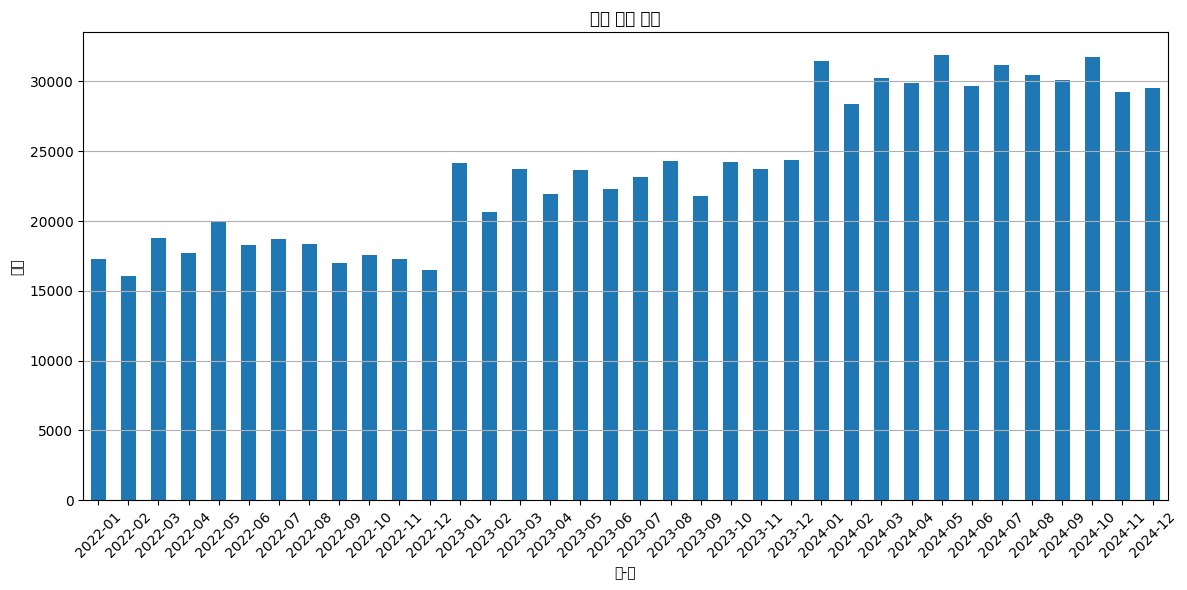

In [ ]:
xx["OrderYearMonthStr"] = xx["OrderDT_1"].apply(lambda x: f"{x[0]}-{x[1]:02d}")

plt.figure(figsize=(12, 6))
xx["OrderYearMonthStr"].value_counts().sort_index().plot(kind="bar")
plt.xticks(rotation=45)
plt.title("월별 주문 건수")
plt.xlabel("연-월")
plt.ylabel("건수")
plt.grid(axis="y")
plt.tight_layout()
plt.show()

In [ ]:
from datetime import datetime

# 날짜 문자열 (예: '25년 1월 1일'과 '25년 1월 2일')
date1 = "00:2:5:05:17:00"
date2 = "00:2:6:06:18:32"

# 날짜 형식을 datetime으로 변환 (포맷: %y-%m-%d)
t1 = datetime.strptime(date1, "%y:%m:%d:%H:%M:%S")
t2 = datetime.strptime(date2, "%y:%m:%d:%H:%M:%S")

# 시간 차이 계산
delta = t2 - t1
seconds = delta.total_seconds()

print(f"{t2} - {t1} = {int(seconds)}초")

2000-02-06 06:18:32 - 2000-02-05 05:17:00 = 90092초


In [ ]:
#formatted = ":".join(map(str, xx["OrderDT_1"]))
#print(formatted)
#xx["OrderDT_11"] = ":".join(map(int, xx["OrderDT_1"]))
#print(xx["OrderDT_11"])

Output hidden; open in https://colab.research.google.com to view.

0         (2022, 1, 6):(2022, 1, 6):(2022, 1, 6):(2022, ...
1         (2022, 1, 6):(2022, 1, 6):(2022, 1, 6):(2022, ...
2         (2022, 1, 6):(2022, 1, 6):(2022, 1, 6):(2022, ...
3         (2022, 1, 6):(2022, 1, 6):(2022, 1, 6):(2022, ...
4         (2022, 1, 6):(2022, 1, 6):(2022, 1, 6):(2022, ...
                                ...                        
855360    (2022, 1, 6):(2022, 1, 6):(2022, 1, 6):(2022, ...
855361    (2022, 1, 6):(2022, 1, 6):(2022, 1, 6):(2022, ...
855362    (2022, 1, 6):(2022, 1, 6):(2022, 1, 6):(2022, ...
855363    (2022, 1, 6):(2022, 1, 6):(2022, 1, 6):(2022, ...
855364    (2022, 1, 6):(2022, 1, 6):(2022, 1, 6):(2022, ...
Name: OrderDT_11, Length: 855365, dtype: object


In [ ]:
xx["OrderDT_str"] = xx["OrderDT_1"].apply(lambda x: f"{x[0]}:{x[1]}:{x[2]}")
print(xx["OrderDT_str"])

0           2022:1:6
1           2022:1:6
2           2022:1:6
3           2022:1:6
4          2022:1:13
             ...    
855360    2024:12:26
855361    2024:12:26
855362    2024:12:26
855363    2024:12:26
855364    2024:12:26
Name: OrderDT_str, Length: 855365, dtype: object


In [ ]:
-def Order